xbloch simulations with stohr&scherz enhancement factor

In [3]:
from LB51.xbloch import sase_sim
from LB51.xbloch import do_xbloch_sim
from LB51.xbloch import enhancement_xbloch2020

from typing import List
import numpy as np 
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import pickle

N_PULSES = 20    # 20 for manuscript
N_TIME_POINTS = int(5e4)    # 5e4 for manuscript plot

## 5 fs Simulations

In [2]:
%pdb
times_5fs = np.linspace(-25, 50, N_TIME_POINTS)
E_in_list = [sase_sim.simulate_gaussian(5.0, times=times_5fs)[1] for _ in range(N_PULSES)]

Automatic pdb calling has been turned ON


In [3]:
#summary_result = do_xbloch_sim.simulate_multipulse_series(times_5fs, E_in_list, enhanced=True)

In [4]:
# save result to pickle for future reference

#results_file = 'LB51/xbloch/results/enhanced_5fs.pickle'
#with open(results_file, 'wb') as f:
#    pickle.dump(summary_result, f)

In [12]:
# load result
results_file = 'LB51/xbloch/results/enhanced_5fs.pickle'

with open(results_file, 'rb') as f:
    loaded_result = pickle.load(f)

## 25 fs Simulations

In [5]:
times_25fs = np.linspace(-50, 100, int(5e4))
E_in_list = [sase_sim.simulate_gaussian(25.0, times=times_25fs)[1] for _ in range(N_PULSES)]

In [6]:
summary_result_25fs = do_xbloch_sim.simulate_multipulse_series(times_25fs, E_in_list, enhanced=True)

In [7]:
# Save result to pickle for future reference

results_file_25fs = 'LB51/xbloch/results/enhanced_25fs.pickle'

with open(results_file_25fs, 'wb') as f:
    pickle.dump(summary_result_25fs, f)

In [15]:
# load result
results_file = 'LB51/xbloch/results/enhanced_25fs.pickle'

with open(results_file, 'rb') as f:
    loaded_result = pickle.load(f)

## Plotting

In [6]:
%matplotlib auto

for i, fluence in enumerate(loaded_result['fluences']):
    plt.plot((loaded_result['summed_transmitted_intensities'][i]-loaded_result['summed_incident_intensities'][i])/loaded_result['fluences'][i], label=str(fluence))
plt.legend(loc='best')

Using matplotlib backend: MacOSX


In [7]:
# make example plot of enhancement factor calculations
from LB51.xbloch import stohr_enhancement
intensities = np.logspace(9, 17, int(1E3))
factors = stohr_enhancement.calculate_factors(intensities)
plt.figure()
plt.semilogx(intensities, factors)
plt.xlabel('Intensities (W/cm$^2$)')
plt.ylabel('Enhancement Factor')

Text(0, 0.5, 'Enhancement Factor')

In [9]:
results_file.keys()

AttributeError: 'str' object has no attribute 'keys'

> <ipython-input-9-86759513fc63>(1)<module>()
----> 1 results_file.keys()

ipdb> exit


In [10]:
loaded_result.keys()

dict_keys(['fluences', 'stim_efficiencies', 'absorption_losses', 'phot', 'summed_incident_intensities', 'summed_transmitted_intensities'])

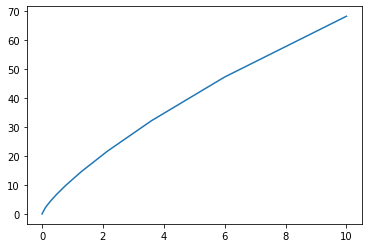

In [9]:
plt.plot(loaded_result['fluences'], loaded_result['absorption_losses'])

In [15]:
ls

LB51/                        cals/                        do_stohr_stimulations.ipynb  plots/
__pycache__/                 data/                        make_manuscript_plots.ipynb  tests/


In [1]:
%matplotlib auto
from LB51.manuscript_plots import quant2

Using matplotlib backend: MacOSX


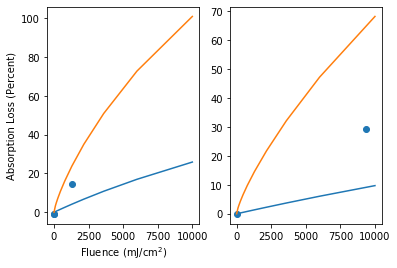

In [2]:
quant2.quant2()

In [5]:
loaded_result.keys()

dict_keys(['fluences', 'stim_efficiencies', 'absorption_losses', 'phot', 'summed_incident_intensities', 'summed_transmitted_intensities'])

(770, 780)

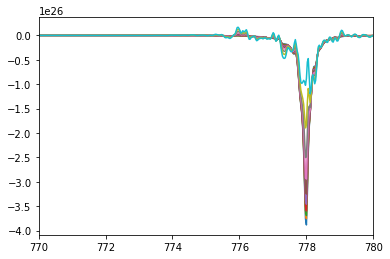

In [18]:
plt.figure()
for i in range(len(loaded_result['summed_transmitted_intensities'])-1):
    intensity_difference = loaded_result['summed_transmitted_intensities'][i]-loaded_result['summed_incident_intensities'][i]
    plt.plot(loaded_result['phot'], intensity_difference/loaded_result['fluences'][i])
plt.xlim((770, 780))